In [20]:
# %qtconsole

# settings
expName = 'cifar-small-v1'
batchSize = 32
useGpu = True

In [21]:
# setup
import os
import torch
import torchvision
# local utils
# !find . -name \*.pyc -delete
from vis_utils import *
from model_def import *
from model_train import *

%matplotlib inline

# create experiment folder
expDir = os.path.join('./data', expName)
if not os.path.exists(expDir):
    os.makedirs(expDir)


In [22]:
# setup and load CIFAR dataset
trainloader, testloader, classes = setup_cifar_data(batchSize)

Files already downloaded and verified
Files already downloaded and verified


plane  ship  ship  bird


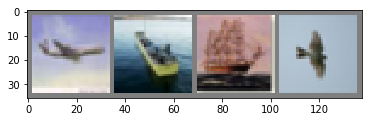

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# take the first 4 samples
images = images[0:4]
labels = labels[0:4]

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [5]:
torch.cuda.is_available()

True

In [24]:
# create a LeNet network
net = Net()

# dispay the network architecture
print(net)

Net (
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d (size=(2, 2), stride=(2, 2), dilation=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear (400 -> 120)
  (fc2): Linear (120 -> 84)
  (fc3): Linear (84 -> 10)
)


In [25]:
# Define a Loss function and optimizer settings
import torch.optim as optim
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)


# Train the network
train_cifar_net(net, trainloader, testloader, criterion, optimizer, expDir, batchSize=batchSize,
                numEpochs=3, useGpu=useGpu, fixFilterList=[], verboseFrequency=100)


# save network
#    to be loaded as:
#       net = Net()
#       net.load_state_dict(torch.load(PATH))
torch.save(net.state_dict(), os.path.join(expDir,'net-trained.dat'))

  0%|          | 0/3 [00:00<?, ?it/s]

epoch:   0 batch:   100 loss: 2.305 accu: 0.107 lr: 0.001000
epoch:   0 batch:   200 loss: 2.302 accu: 0.111 lr: 0.001000
epoch:   0 batch:   300 loss: 2.302 accu: 0.142 lr: 0.001000
epoch:   0 batch:   400 loss: 2.302 accu: 0.135 lr: 0.001000
epoch:   0 batch:   500 loss: 2.301 accu: 0.134 lr: 0.001000
epoch:   0 batch:   600 loss: 2.299 accu: 0.166 lr: 0.001000
epoch:   0 batch:   700 loss: 2.297 accu: 0.167 lr: 0.001000
epoch:   0 batch:   800 loss: 2.295 accu: 0.181 lr: 0.001000
epoch:   0 batch:   900 loss: 2.290 accu: 0.184 lr: 0.001000
epoch:   0 batch:  1000 loss: 2.286 accu: 0.162 lr: 0.001000
epoch:   0 batch:  1100 loss: 2.275 accu: 0.170 lr: 0.001000
epoch:   0 batch:  1200 loss: 2.254 accu: 0.189 lr: 0.001000
epoch:   0 batch:  1300 loss: 2.221 accu: 0.204 lr: 0.001000
epoch:   0 batch:  1400 loss: 2.181 accu: 0.200 lr: 0.001000
epoch:   0 batch:  1500 loss: 2.124 accu: 0.227 lr: 0.001000


 33%|███▎      | 1/3 [00:31<01:02, 31.12s/it]

epoch:   1 batch:   100 loss: 2.024 accu: 0.256 lr: 0.001000
epoch:   1 batch:   200 loss: 2.006 accu: 0.261 lr: 0.001000
epoch:   1 batch:   300 loss: 1.961 accu: 0.278 lr: 0.001000
epoch:   1 batch:   400 loss: 1.908 accu: 0.301 lr: 0.001000
epoch:   1 batch:   500 loss: 1.939 accu: 0.295 lr: 0.001000
epoch:   1 batch:   600 loss: 1.886 accu: 0.303 lr: 0.001000
epoch:   1 batch:   700 loss: 1.861 accu: 0.325 lr: 0.001000
epoch:   1 batch:   800 loss: 1.846 accu: 0.331 lr: 0.001000
epoch:   1 batch:   900 loss: 1.822 accu: 0.338 lr: 0.001000
epoch:   1 batch:  1000 loss: 1.824 accu: 0.338 lr: 0.001000
epoch:   1 batch:  1100 loss: 1.768 accu: 0.358 lr: 0.001000
epoch:   1 batch:  1200 loss: 1.776 accu: 0.359 lr: 0.001000
epoch:   1 batch:  1300 loss: 1.738 accu: 0.373 lr: 0.001000
epoch:   1 batch:  1400 loss: 1.724 accu: 0.373 lr: 0.001000
epoch:   1 batch:  1500 loss: 1.705 accu: 0.379 lr: 0.001000


 67%|██████▋   | 2/3 [01:02<00:31, 31.09s/it]

epoch:   2 batch:   100 loss: 1.701 accu: 0.378 lr: 0.001000
epoch:   2 batch:   200 loss: 1.663 accu: 0.397 lr: 0.001000
epoch:   2 batch:   300 loss: 1.690 accu: 0.386 lr: 0.001000
epoch:   2 batch:   400 loss: 1.657 accu: 0.398 lr: 0.001000
epoch:   2 batch:   500 loss: 1.618 accu: 0.408 lr: 0.001000
epoch:   2 batch:   600 loss: 1.637 accu: 0.403 lr: 0.001000
epoch:   2 batch:   700 loss: 1.675 accu: 0.393 lr: 0.001000
epoch:   2 batch:   800 loss: 1.644 accu: 0.402 lr: 0.001000
epoch:   2 batch:   900 loss: 1.617 accu: 0.416 lr: 0.001000
epoch:   2 batch:  1000 loss: 1.618 accu: 0.412 lr: 0.001000
epoch:   2 batch:  1100 loss: 1.605 accu: 0.417 lr: 0.001000
epoch:   2 batch:  1200 loss: 1.602 accu: 0.420 lr: 0.001000
epoch:   2 batch:  1300 loss: 1.582 accu: 0.438 lr: 0.001000
epoch:   2 batch:  1400 loss: 1.562 accu: 0.426 lr: 0.001000
epoch:   2 batch:  1500 loss: 1.568 accu: 0.429 lr: 0.001000


100%|██████████| 3/3 [01:32<00:00, 30.83s/it]

Finished Training


In [28]:
# DEBUG - Retrain after freezing layers
# -- fixFilterList = 3
expName = 'cifar-small-v3'
# create experiment folder
expDir = os.path.join('./data', expName)
if not os.path.exists(expDir):
    os.makedirs(expDir)
    
train_cifar_net(net, trainloader, testloader, criterion, optimizer, expDir, batchSize=batchSize,
            numEpochs=3, useGpu=useGpu, fixFilterList=3, verboseFrequency=50)

  0%|          | 0/3 [00:00<?, ?it/s]

epoch:   0 batch:    50 loss: 1.634 accu: 0.393 lr: 0.001000
epoch:   0 batch:   100 loss: 1.615 accu: 0.384 lr: 0.001000
epoch:   0 batch:   150 loss: 1.606 accu: 0.383 lr: 0.001000
epoch:   0 batch:   200 loss: 1.627 accu: 0.385 lr: 0.001000
epoch:   0 batch:   250 loss: 1.628 accu: 0.390 lr: 0.001000
epoch:   0 batch:   300 loss: 1.659 accu: 0.380 lr: 0.001000
epoch:   0 batch:   350 loss: 1.621 accu: 0.390 lr: 0.001000
epoch:   0 batch:   400 loss: 1.639 accu: 0.371 lr: 0.001000
epoch:   0 batch:   450 loss: 1.701 accu: 0.360 lr: 0.001000
epoch:   0 batch:   500 loss: 1.640 accu: 0.385 lr: 0.001000
epoch:   0 batch:   550 loss: 1.621 accu: 0.403 lr: 0.001000
epoch:   0 batch:   600 loss: 1.637 accu: 0.382 lr: 0.001000
epoch:   0 batch:   650 loss: 1.642 accu: 0.391 lr: 0.001000
epoch:   0 batch:   700 loss: 1.636 accu: 0.395 lr: 0.001000
epoch:   0 batch:   750 loss: 1.663 accu: 0.378 lr: 0.001000
epoch:   0 batch:   800 loss: 1.655 accu: 0.378 lr: 0.001000
epoch:   0 batch:   850 

 33%|███▎      | 1/3 [00:49<01:38, 49.40s/it]

epoch:   1 batch:    50 loss: 1.635 accu: 0.384 lr: 0.001000
epoch:   1 batch:   100 loss: 1.599 accu: 0.401 lr: 0.001000
epoch:   1 batch:   150 loss: 1.616 accu: 0.388 lr: 0.001000
epoch:   1 batch:   200 loss: 1.594 accu: 0.402 lr: 0.001000
epoch:   1 batch:   250 loss: 1.636 accu: 0.384 lr: 0.001000
epoch:   1 batch:   300 loss: 1.635 accu: 0.393 lr: 0.001000
epoch:   1 batch:   350 loss: 1.656 accu: 0.386 lr: 0.001000
epoch:   1 batch:   400 loss: 1.644 accu: 0.388 lr: 0.001000
epoch:   1 batch:   450 loss: 1.631 accu: 0.383 lr: 0.001000
epoch:   1 batch:   500 loss: 1.616 accu: 0.391 lr: 0.001000
epoch:   1 batch:   550 loss: 1.615 accu: 0.396 lr: 0.001000
epoch:   1 batch:   600 loss: 1.644 accu: 0.374 lr: 0.001000
epoch:   1 batch:   650 loss: 1.633 accu: 0.385 lr: 0.001000
epoch:   1 batch:   700 loss: 1.608 accu: 0.395 lr: 0.001000
epoch:   1 batch:   750 loss: 1.629 accu: 0.378 lr: 0.001000
epoch:   1 batch:   800 loss: 1.662 accu: 0.395 lr: 0.001000
epoch:   1 batch:   850 

 67%|██████▋   | 2/3 [01:38<00:49, 49.28s/it]

epoch:   2 batch:    50 loss: 1.620 accu: 0.401 lr: 0.001000
epoch:   2 batch:   100 loss: 1.615 accu: 0.388 lr: 0.001000
epoch:   2 batch:   150 loss: 1.617 accu: 0.406 lr: 0.001000
epoch:   2 batch:   200 loss: 1.657 accu: 0.371 lr: 0.001000
epoch:   2 batch:   250 loss: 1.651 accu: 0.382 lr: 0.001000
epoch:   2 batch:   300 loss: 1.649 accu: 0.378 lr: 0.001000
epoch:   2 batch:   350 loss: 1.664 accu: 0.369 lr: 0.001000
epoch:   2 batch:   400 loss: 1.600 accu: 0.401 lr: 0.001000
epoch:   2 batch:   450 loss: 1.634 accu: 0.376 lr: 0.001000
epoch:   2 batch:   500 loss: 1.667 accu: 0.367 lr: 0.001000
epoch:   2 batch:   550 loss: 1.620 accu: 0.406 lr: 0.001000
epoch:   2 batch:   600 loss: 1.602 accu: 0.396 lr: 0.001000
epoch:   2 batch:   650 loss: 1.620 accu: 0.397 lr: 0.001000
epoch:   2 batch:   700 loss: 1.649 accu: 0.376 lr: 0.001000
epoch:   2 batch:   750 loss: 1.660 accu: 0.385 lr: 0.001000
epoch:   2 batch:   800 loss: 1.644 accu: 0.391 lr: 0.001000
epoch:   2 batch:   850 

100%|██████████| 3/3 [02:27<00:00, 49.08s/it]

Finished Training


GroundTruth: 
 	 frog 	 frog 	  car 	 frog
Predicted: 
 	 bird 	 frog 	  car 	 frog


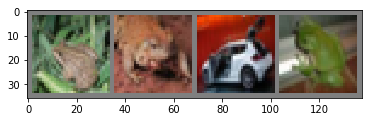

In [26]:
# Display images from the test set

dataiter = iter(testloader)
images, labels = dataiter.next()

# take the first 4 samples
images = images[4:8]
labels = labels[4:8]

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: \n \t' + ' \t'.join('%5s' % classes[labels[j]] for j in range(4)))

# network predictions
outputs = net(Variable(images))
outputs.size()
_, predicted = torch.max(outputs.data, 1)
predicted.size()

print('Predicted: \n \t' + ' \t'.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

In [29]:
if useGpu:
    net.cuda()

# Performance on train set
print('Accuracy of the network on the 50000 training images: %d %%' % (
    accuracy_on_dataset(net, trainloader, useGpu)))

# Performance on test set
print('Accuracy of the network on the 10000 test images: %d %%' % (
    accuracy_on_dataset(net, testloader, useGpu)))

Accuracy of the network on the 50000 training images: 38 %
Accuracy of the network on the 10000 test images: 38 %


In [17]:
# Per-class accuracy on test set
print_cifar_per_class_accuracy(net, classes, testloader, useGpu)

Accuracy of plane : 58 %
Accuracy of   car : 76 %
Accuracy of  bird : 21 %
Accuracy of   cat : 21 %
Accuracy of  deer : 19 %
Accuracy of   dog : 47 %
Accuracy of  frog : 62 %
Accuracy of horse : 57 %
Accuracy of  ship : 58 %
Accuracy of truck : 40 %


In [7]:
# load trained model
net = Net()
print net

net_wide = NetWide(10)
net_wide


Net (
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d (size=(2, 2), stride=(2, 2), dilation=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear (400 -> 120)
  (fc2): Linear (120 -> 84)
  (fc3): Linear (84 -> 10)
)
10


NetWide (
  (conv1): Conv2d(3, 16, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d (size=(2, 2), stride=(2, 2), dilation=(1, 1))
  (conv2): Conv2d(16, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear (400 -> 120)
  (fc2): Linear (120 -> 84)
  (fc3): Linear (84 -> 10)
)

In [52]:
params = list(net_wide.parameters())

In [28]:
optimizer = optim.SGD(net_wide.parameters(), lr=0.1, momentum=0.9, weight_decay=5e-4)